# Part I - Prosper Loan Data Exploration
### by Cara Finlay

- [Introduction](#Introduction)
- [Preliminary Wrangling](#Preliminary-Wrangling)
- [Data Cleaning](#Data-Cleaning)
- [Univariate Exploration](#Univariate-Exploration)
- [Bivariate Exploration](#Bivariate-Exploration)
- [Multivariate Exploration](#Multivariate-Exploration)
- [Conclusion](#Conclusion)


## Introduction

This document explores a data set which contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("darkgrid")

%matplotlib inline

In [2]:
# load the dataset into a pandas dataframe

loan_original = pd.read_csv('prosperLoanData.csv')

In [3]:
# setting the display options for the dataframes

pd.set_option('display.max_columns',500)
pd.set_option('max_colwidth',800)

In [4]:
# high-level overview of data shape and composition

print(loan_original.shape)

(113937, 81)


In [5]:
loan_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
loan_original.head(10)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7  0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   
5         NaN    60    Current                  NaN      0.15425   
6         NaN    36    Current                  NaN      0.31032   
7         NaN    36    Current                  NaN      0.23939   
8         NaN    36    Current                  NaN      0.07620   
9         NaN    36    Current                  NaN      0.07620   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   
5        0.1314       0.1214                  0.11567         0.0449   
6        0.2712       0.2612                  0.23820         0.1275   
7        0.2019       0.1919                  0.17830         0.0799   
8        0.0629       0.0529                  0.05221         0.0099   
9        0.0629       0.0529                  0.05221         0.0099   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   
5          0.07077                      5.0                     B   
6          0.11070                      2.0                     E   
7          0.09840                      4.0                     C   
8          0.04231                      7.0                    AA   
9          0.04231                      7.0                    AA   

   ProsperScore  ListingCategory (numeric) BorrowerState      Occupation  \
0           NaN                          0            CO           Other   
1           7.0                          2            CO    Professional   
2           NaN                          0            GA           Other   
3           9.0                         16            GA   Skilled Labor   
4           4.0                          2            MN       Executive   
5          10.0                          1            NM    Professional   
6           2.0                          1            KS  Sales - Retail   
7           4.0                          2            CA         Laborer   
8           9.0                          7            IL    Food Service   
9          11.0                          7            IL    Food Service   

  EmploymentStatus  EmploymentStatusDura

In [7]:
loan_original['ListingCreationDate'].sort_values()

# ProsperScore	A custom risk score built using historical Prosper data. 
# The score ranges from 1-10, with 10 being the best, or lowest risk score.  
# Applicable for loans originated after July 2009.

113921    2005-11-09 20:44:28.847000000
106735    2005-11-11 08:46:17.303000000
25166     2005-11-15 16:06:47.457000000
62297     2005-11-15 18:25:56.107000000
90598     2005-11-18 13:39:03.263000000
                      ...              
104205    2014-03-10 06:47:15.370000000
73267     2014-03-10 07:33:30.033000000
67741     2014-03-10 10:25:51.877000000
32376     2014-03-10 11:28:06.920000000
14131     2014-03-10 12:20:53.760000000
Name: ListingCreationDate, Length: 113937, dtype: object

In [8]:
duplicates = loan_original.duplicated().sum()
print('There are {} duplicate records in the dataset'.format(duplicates))

There are 0 duplicate records in the dataset


### Structure of the dataset:

The dataset contains 113,937 rows and 81 columns. Each row serves as an individual loan entry and the columns describe features of the loan. The dataset contains information both interesting to borrowers and lenders. 

### What are the main features of interest in the dataset?

In the interest of lenders, this analysis will aim to explore the nature of borrowers and loan categories to determine which loans result in the highest lender yields whilst holding the lowest risk. The exploration will dive into the different loan categories, borrower risk factors, loan yields and loan terms. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

**ListingCreationDate**	- The date the listing was created.

**ProsperScore** - A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

**Term** - The length of the loan expressed in months.

**LoanStatus** - The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, 

FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

**LenderYield**	- The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

**EstimatedEffectiveYield**	- Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees.  Applicable for loans originated after July 2009.

**EstimatedLoss** - Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.

**EstimatedReturn**	- The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.

**ListingCategory**	- The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

**EmploymentStatus** - The employment status of the borrower at the time they posted the listing.

**IncomeRange**	- The income range of the borrower at the time the listing was created.

**DebtToIncomeRatio** - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

**LoanOriginalAmount** - The origination amount of the loan.

**CurrentDelinquencies** - Number of accounts delinquent at the time the credit profile was pulled.


## Data Cleaning

The next section will clean the following data wrangling issues observed after visual and programmatic assessment: 

1. Copy of dataframe containing only necessary key features.

2. Incorrect datatypes for 'ListingCreationDate','LoanStatus',
    'ListingCategory','EmploymentStatus','IncomeRange'

3. The numeric data in the 'ListingCategory (numeric)' can be converted to categorical data to provide 
    description of reason for loan. 
    
4. IncomeRange should be ordered as it is ordinal categorical data. 

5. Dataset should be filtered to only include values post July 2009, as the Prosper Score feature will be heavily utilized in the dataset. 

6. NaN values in the Income Range column can be replaced with $0 where employment status is not employed.


#### Copy orginal dataframe and select columns needed for analysis.

In [9]:
# selecting the key features columns to assign to new copy of dataframe 
key_features = ['ListingCreationDate','ProsperScore','Term','LoanStatus',
                     'LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn',
                      'ListingCategory (numeric)','EmploymentStatus','IncomeRange',
                      'DebtToIncomeRatio','LoanOriginalAmount','TradesNeverDelinquent (percentage)', 'CurrentCreditLines']
            
            
            

# copying the dataframe with selected key features columns 
loan = loan_original[key_features].copy()

In [10]:
# testing 
loan.head()

ListingCreationDate  ProsperScore  Term LoanStatus  LenderYield  \
0  2007-08-26 19:09:29.263000000           NaN    36  Completed       0.1380   
1  2014-02-27 08:28:07.900000000           7.0    36    Current       0.0820   
2  2007-01-05 15:00:47.090000000           NaN    36  Completed       0.2400   
3  2012-10-22 11:02:35.010000000           9.0    36    Current       0.0874   
4  2013-09-14 18:38:39.097000000           4.0    36    Current       0.1985   

   EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
0                      NaN            NaN              NaN   
1                  0.07960         0.0249          0.05470   
2                      NaN            NaN              NaN   
3                  0.08490         0.0249          0.06000   
4                  0.18316         0.0925          0.09066   

   ListingCategory (numeric) EmploymentStatus     IncomeRange  \
0                          0    Self-employed  $25,000-49,999   
1                          2         Employed  $50,000-74,999   
2                          0    Not available   Not displayed   
3                         16         Employed  $25,000-49,999   
4                          2         Employed       $100,000+   

   DebtToIncomeRatio  LoanOriginalAmount  TradesNeverDelinquent (percentage)  \
0               0.17                9425                                0.81   
1               0.18               10000                                1.00   
2               0.06                3001                                 NaN   
3               0.15               10000                                0.76   
4               0.26               15000                                0.95   

   CurrentCreditLines  
0                 5.0  
1                14.0  
2                 NaN  
3                 5.0  
4                19.0

In [11]:
loan[~loan['ProsperScore'].isna()]['ListingCreationDate'].min()

'2009-07-13 18:01:24.347000000'

In [12]:
loan['ListingCreationDate'].min(),loan['ListingCreationDate'].max()

('2005-11-09 20:44:28.847000000', '2014-03-10 12:20:53.760000000')

In [13]:
loan['ProsperScore'].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [14]:
loan['ProsperScore'].isna().sum()

29084

In [15]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingCreationDate                 113937 non-null  object 
 1   ProsperScore                        84853 non-null   float64
 2   Term                                113937 non-null  int64  
 3   LoanStatus                          113937 non-null  object 
 4   LenderYield                         113937 non-null  float64
 5   EstimatedEffectiveYield             84853 non-null   float64
 6   EstimatedLoss                       84853 non-null   float64
 7   EstimatedReturn                     84853 non-null   float64
 8   ListingCategory (numeric)           113937 non-null  int64  
 9   EmploymentStatus                    111682 non-null  object 
 10  IncomeRange                         113937 non-null  object 
 11  DebtToIncomeRatio         

#### Incorrect datatypes for 'ListingCreationDate','LoanStatus','ClosedDate', 'ListingCategory','EmploymentStatus','IncomeRange'


In [16]:
# ListingCreationDate to datetime

loan['ListingCreationDate'] = pd.to_datetime(loan['ListingCreationDate'])

In [17]:
# LoanStatus to category 

loan['LoanStatus'] = loan['LoanStatus'].astype('category')

In [18]:
# ListingCategory (numeric) to category

loan['ListingCategory'] = loan['ListingCategory (numeric)'].astype('category')

In [19]:
# EmploymentStatus to category

loan['EmploymentStatus'] = loan['EmploymentStatus'].astype('category')

In [20]:
# IncomeRange to category 

loan['IncomeRange'] = loan['IncomeRange'].astype('category')

In [21]:
# ProsperScore to category 

loan['ProsperScore'] = loan['ProsperScore'].astype('category')

In [22]:
# Term to category

loan['Term'] = loan['Term'].astype('category')

In [23]:
# testing 

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   ListingCreationDate                 113937 non-null  datetime64[ns]
 1   ProsperScore                        84853 non-null   category      
 2   Term                                113937 non-null  category      
 3   LoanStatus                          113937 non-null  category      
 4   LenderYield                         113937 non-null  float64       
 5   EstimatedEffectiveYield             84853 non-null   float64       
 6   EstimatedLoss                       84853 non-null   float64       
 7   EstimatedReturn                     84853 non-null   float64       
 8   ListingCategory (numeric)           113937 non-null  int64         
 9   EmploymentStatus                    111682 non-null  category      
 10  IncomeRa

####  The numeric data in the 'ListingCategory (numeric)' can be converted to categorical data to provide description of reason for loan. 

In [24]:
# creating a dictionary to replace numerical raiting with categorical descriptions 
listing_categories = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
                   4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
                   9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
                  13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
                  17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

# mapping the dictionary contents to the column 
loan['ListingCategory'] = loan['ListingCategory (numeric)'].map(listing_categories)

# dropping the numeric column as it is no longer needed for this analysis
loan.drop(columns=['ListingCategory (numeric)'], inplace=True)

# testing 

loan['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical or Dental      1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby & Adoption         199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

#### Ordering IncomeRange 

In [25]:
# convert IncomeRange to ordered categorical types
ordered_income = {'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', 
                              '$50,000-74,999', '$75,000-99,999', '$100,000+']}

# assign the correct order to the 
for key,value in ordered_income.items():
    ordered = pd.api.types.CategoricalDtype(categories=value, 
                                            ordered=True)
    loan[key] = loan[key].astype(ordered)

#### filtering the dataframe to only include dates following July 2009. Since this analysis will focus on the prosper score of the dataframe, I have decided to only work with the data applicable to this custom prediction rating. 

In [26]:
# filtering for all dates following July 2009
loan = loan.query("(ListingCreationDate.dt.year > 2009) | ((ListingCreationDate.dt.year == 2009) & (ListingCreationDate.dt.month >= 7))")

# checking the earliest and latest date in the dataframe
loan['ListingCreationDate'].sort_values()

39013    2009-07-13 18:01:24.347
18374    2009-07-13 18:04:40.220
48139    2009-07-13 19:08:45.763
47705    2009-07-13 19:09:37.827
8072     2009-07-13 19:19:50.213
                   ...          
104205   2014-03-10 06:47:15.370
73267    2014-03-10 07:33:30.033
67741    2014-03-10 10:25:51.877
32376    2014-03-10 11:28:06.920
14131    2014-03-10 12:20:53.760
Name: ListingCreationDate, Length: 84853, dtype: datetime64[ns]

In [27]:
# count of data for each month
loan['ListingCreationDate'].dt.month.value_counts()

1     9201
10    8728
12    8441
11    8245
2     7963
9     7625
7     6638
8     6443
6     5808
5     5470
3     5385
4     4906
Name: ListingCreationDate, dtype: int64

#### Replacing NaN values in the Income Range column with $0 where employment status is 'not employed'

In [28]:
#checking number of NaN and number of $0 values 

loan['IncomeRange'].isna().sum(), loan['IncomeRange'].value_counts()

(649,
 $50,000-74,999    25627
 $25,000-49,999    24175
 $100,000+         15205
 $75,000-99,999    14498
 $1-24,999          4654
 $0                   45
 Name: IncomeRange, dtype: int64)

In [29]:
#checking number of Not Employed 

loan['EmploymentStatus'].value_counts()

Employed         67310
Full-time         7927
Self-employed     4538
Other             3806
Not employed       649
Retired            367
Part-time          256
Not available        0
Name: EmploymentStatus, dtype: int64

In [30]:
# reassigning values in the Income range column where unemployed

loan['IncomeRange'] = np.where(loan['EmploymentStatus'] == 'Not employed', '$0', loan['IncomeRange'])

In [31]:
#testing for NaN and $0 values in IncomeRange

loan['IncomeRange'].isna().sum(), loan['IncomeRange'].value_counts()

(0,
 $50,000-74,999    25627
 $25,000-49,999    24175
 $100,000+         15205
 $75,000-99,999    14498
 $1-24,999          4654
 $0                  694
 Name: IncomeRange, dtype: int64)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [32]:
loan.describe()

LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  84853.000000             84853.000000   84853.000000     84853.000000   
mean       0.186017                 0.168661       0.080306         0.096068   
std        0.074631                 0.068467       0.046764         0.030403   
min        0.030000                -0.182700       0.004900        -0.182700   
25%        0.125900                 0.115670       0.042400         0.074080   
50%        0.177500                 0.161500       0.072400         0.091700   
75%        0.247400                 0.224300       0.112000         0.116600   
max        0.340000                 0.319900       0.366000         0.283700   

       DebtToIncomeRatio  LoanOriginalAmount  \
count       77557.000000        84853.000000   
mean            0.258752         9083.440515   
std             0.318326         6287.860058   
min             0.000000         1000.000000   
25%             0.150000         4000.000000   
50%             0.220000         7500.000000   
75%             0.320000        13500.000000   
max            10.010000        35000.000000   

       TradesNeverDelinquent (percentage)  CurrentCreditLines  
count                        84853.000000        84853.000000  
mean                             0.905914           10.508032  
std                              0.121353            5.317401  
min                              0.080000            0.000000  
25%                              0.850000            7.000000  
50%                              0.950000           10.000000  
75%                              1.000000           13.000000  
max                              1.000000           59.000000

#### Observing the Loan Amount

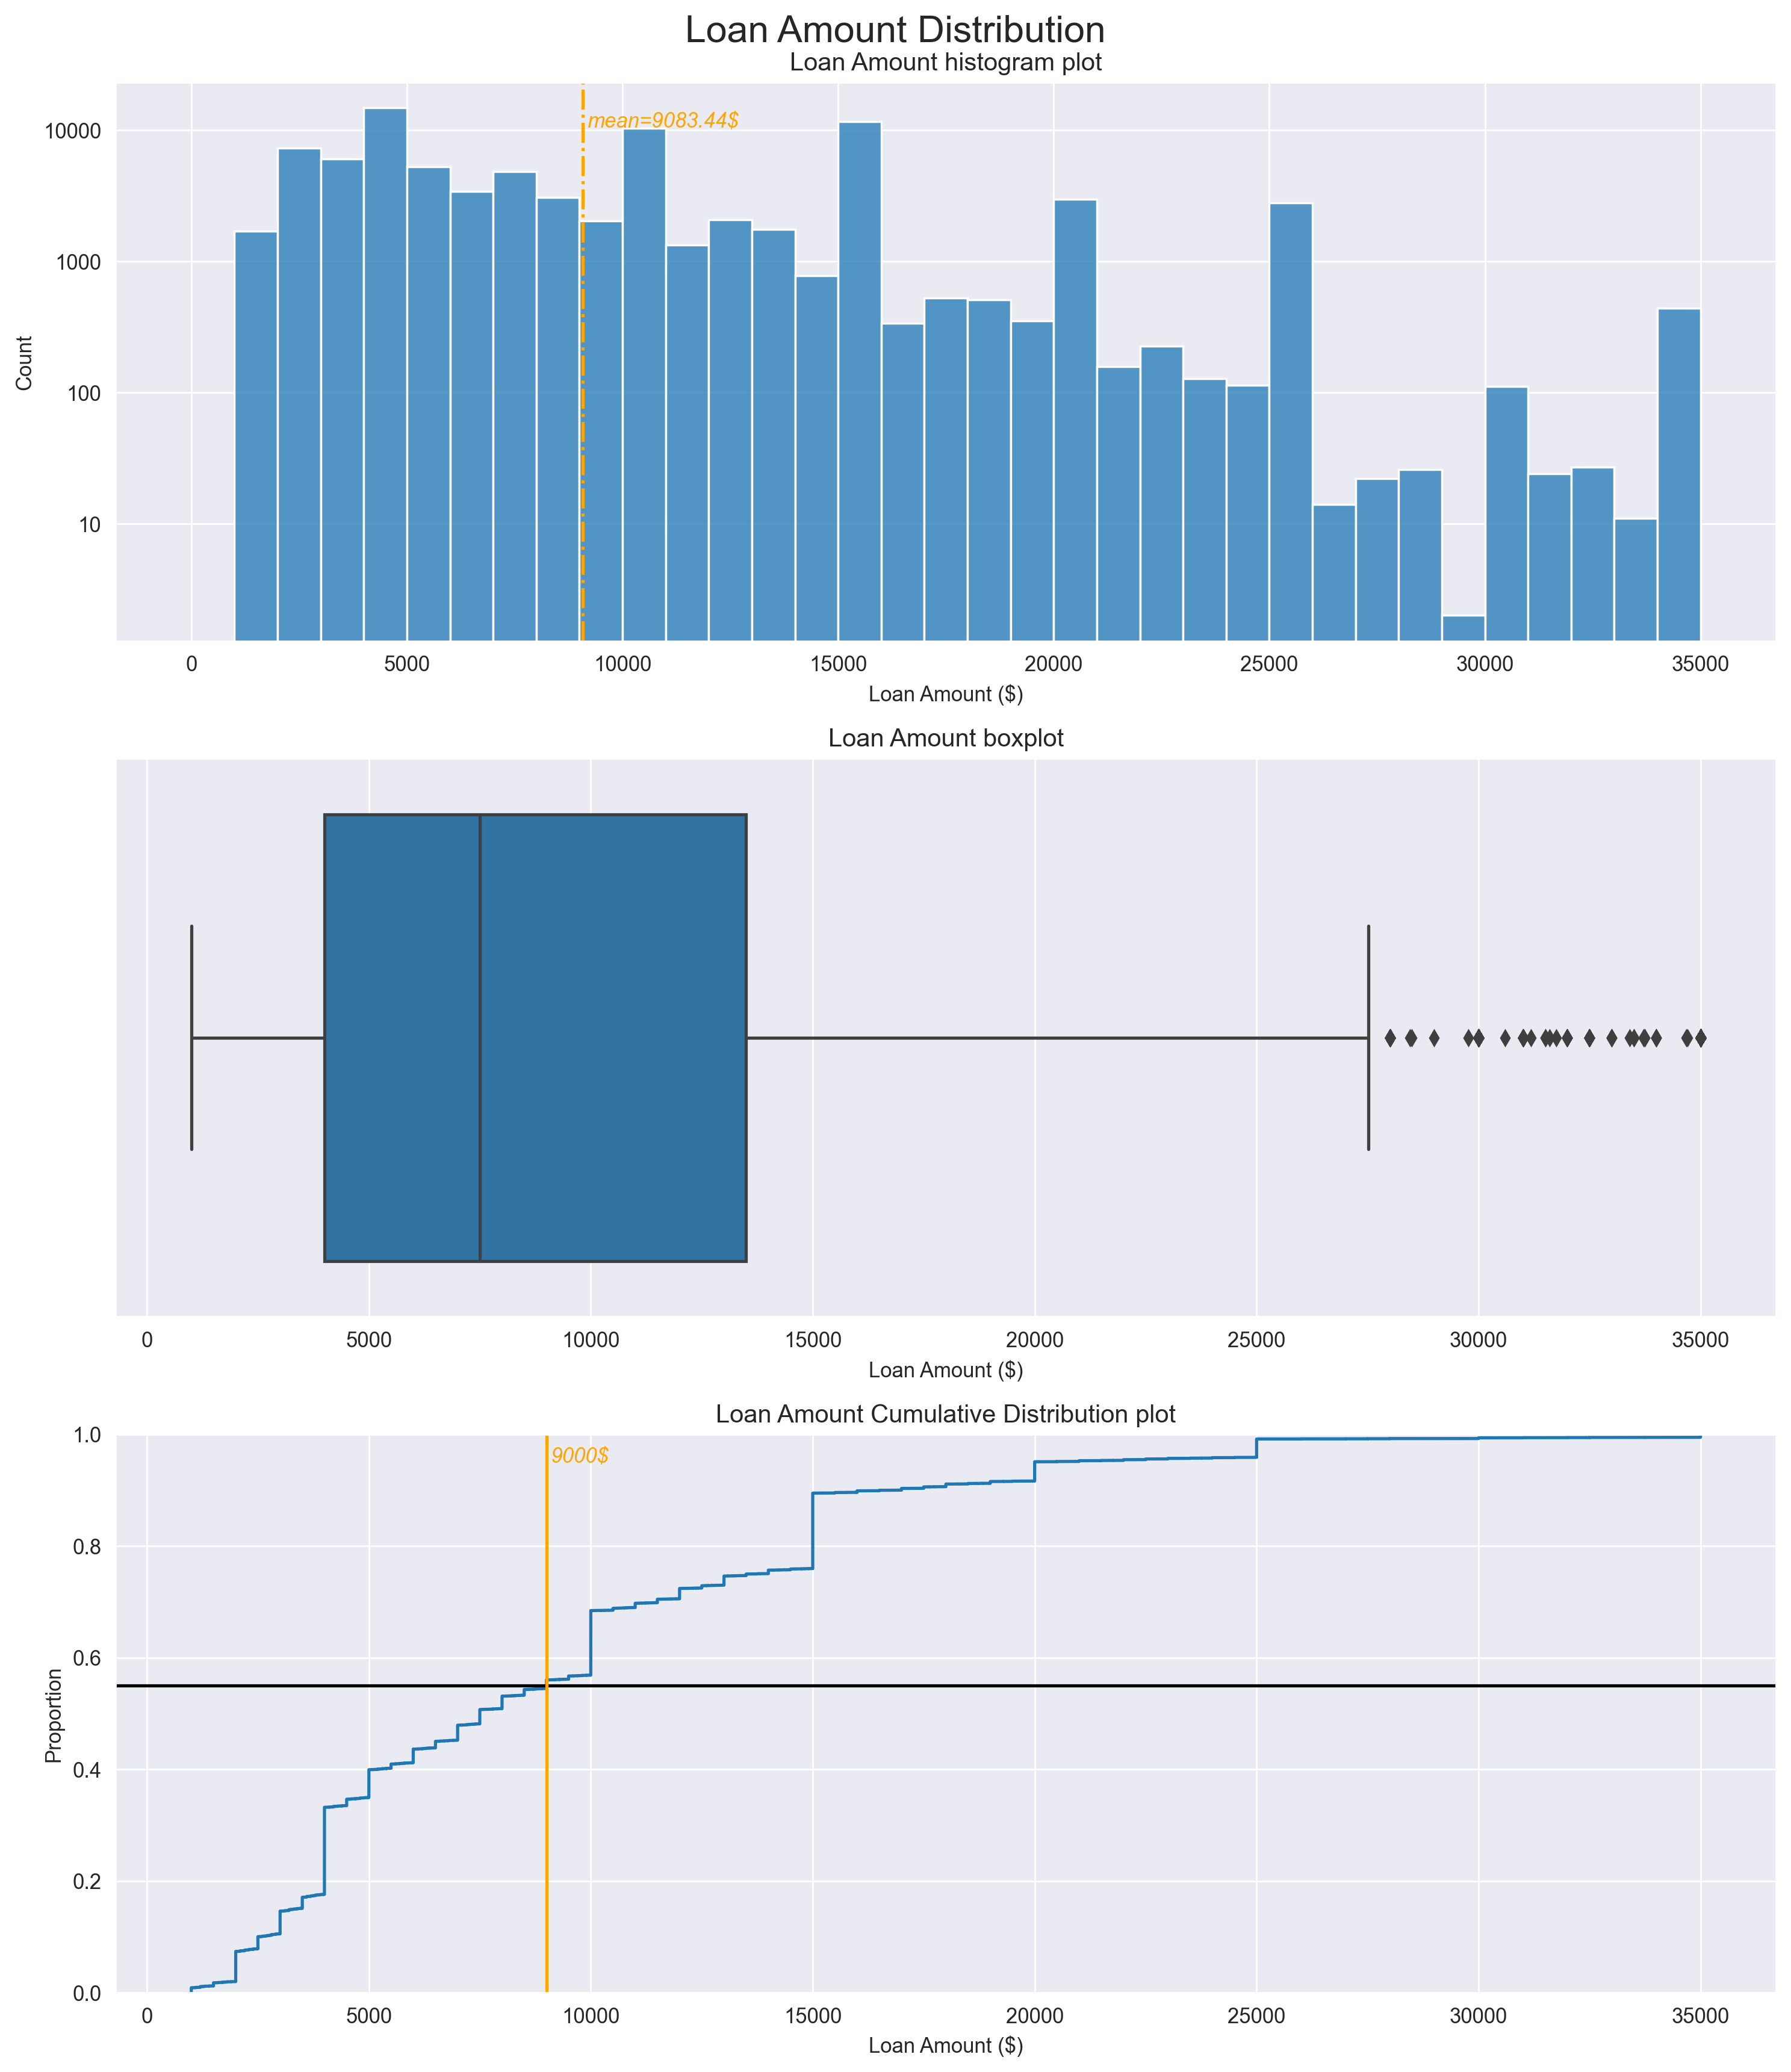

In [33]:
binsize = 1000

bins = np.arange(0, loan['LoanOriginalAmount'].max()+binsize, binsize, )

# creating 3 subplots
fig, axes = plt.subplots(nrows=3,figsize=[12, 14], dpi=250)


# main title:
fig.suptitle("Loan Amount Distribution", fontsize=18)

# the plots:
sb.histplot(data=loan, x='LoanOriginalAmount', ax = axes[0], bins=bins, log=True);
sb.boxplot(data=loan, x='LoanOriginalAmount', ax=axes[1]);
sb.ecdfplot(data=loan, x='LoanOriginalAmount', ax=axes[2]);

# histogram customization: 
mean_price = np.round(loan["LoanOriginalAmount"].mean(), 2)
axes[0].axvline(mean_price, color="orange", linestyle="-.", linewidth=1.5)

axes[0].text(
    x=mean_price + 100,
    y=10500,
    s=f"mean={mean_price}$",
    style="italic",
    color='orange'
)

# ecdf customization
axes[2].axhline(0.55, color='black')
axes[2].axvline(9000, color='orange')
axes[2].text(
    x=9000 + 100,
    y=0.95,
    s=f"9000$",
    style="italic",
    color='orange'
)

# log scale histogram customization
axes[0].set_yticks(np.logspace(1, 4, 4), ['10', '100', '1000', '10000']) 

# titles and labels
axes[0].set_title('Loan Amount histogram plot')
axes[1].set_title('Loan Amount boxplot')
axes[2].set_title('Loan Amount Cumulative Distribution plot')
axes[0].set_xlabel("Loan Amount ($)");
axes[1].set_xlabel("Loan Amount ($)")
axes[2].set_xlabel("Loan Amount ($)")
plt.tight_layout()

* The histogram and box-plot for loan amount is right skewed. The mean loan amount is around $9 000. It would be interesting to investigate why the majority of the loans are smaller and in which categories these loans exist. 

* The cumulative distribution plot shows us that 55% of loans are below  9000 USD. 

#### Observing the count of loan category 

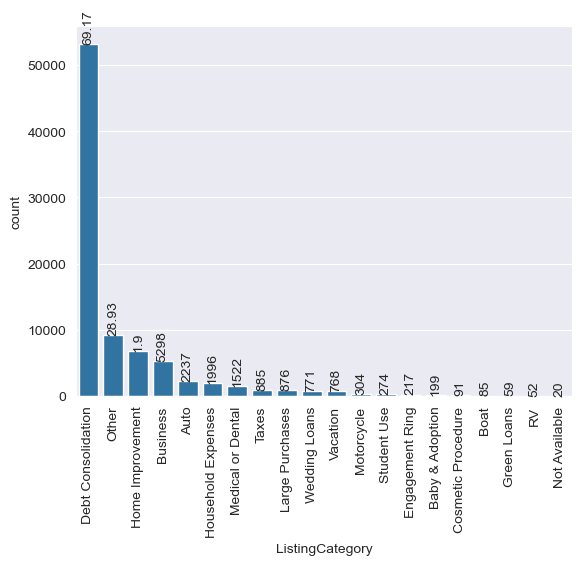

In [34]:
# Observing the count of loan category 

default_color = sb.color_palette()[0]
ax = sb.countplot(x=loan['ListingCategory'],order=loan['ListingCategory'].value_counts(ascending=False).index, color = default_color);

rel_values = loan['Term'].value_counts(ascending=False, normalize=True).values * 100

ax.bar_label(container=ax.containers[0], labels=rel_values.round(2), rotation=90)

plt.xticks(rotation=90);

Surprisingly the majority of loans are taken out to pay off existing loans, accounting for almost 70% of all loans in the dataset. Unfortunately no category descriptions are available for the two runner up categories i.e. not available and other. The fourth and fifth biggest categories are home improvement and business loans respectively. These two categories are less surprising and one would possibly expect them to be bigger. 

#### Observing the Lender Yield 

<Figure size 800x800 with 0 Axes>

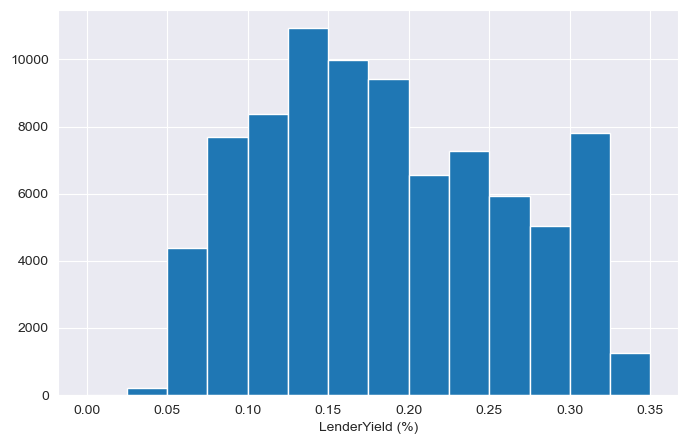

In [35]:
plt.figure(figsize=(8, 8))
binsize = 0.025

bins = np.arange(0, loan['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loan, x='LenderYield', bins=bins)
plt.xlabel('LenderYield (%)')
plt.show()

#### Some more histograms observing estimations for yields, returns and losses for lenders

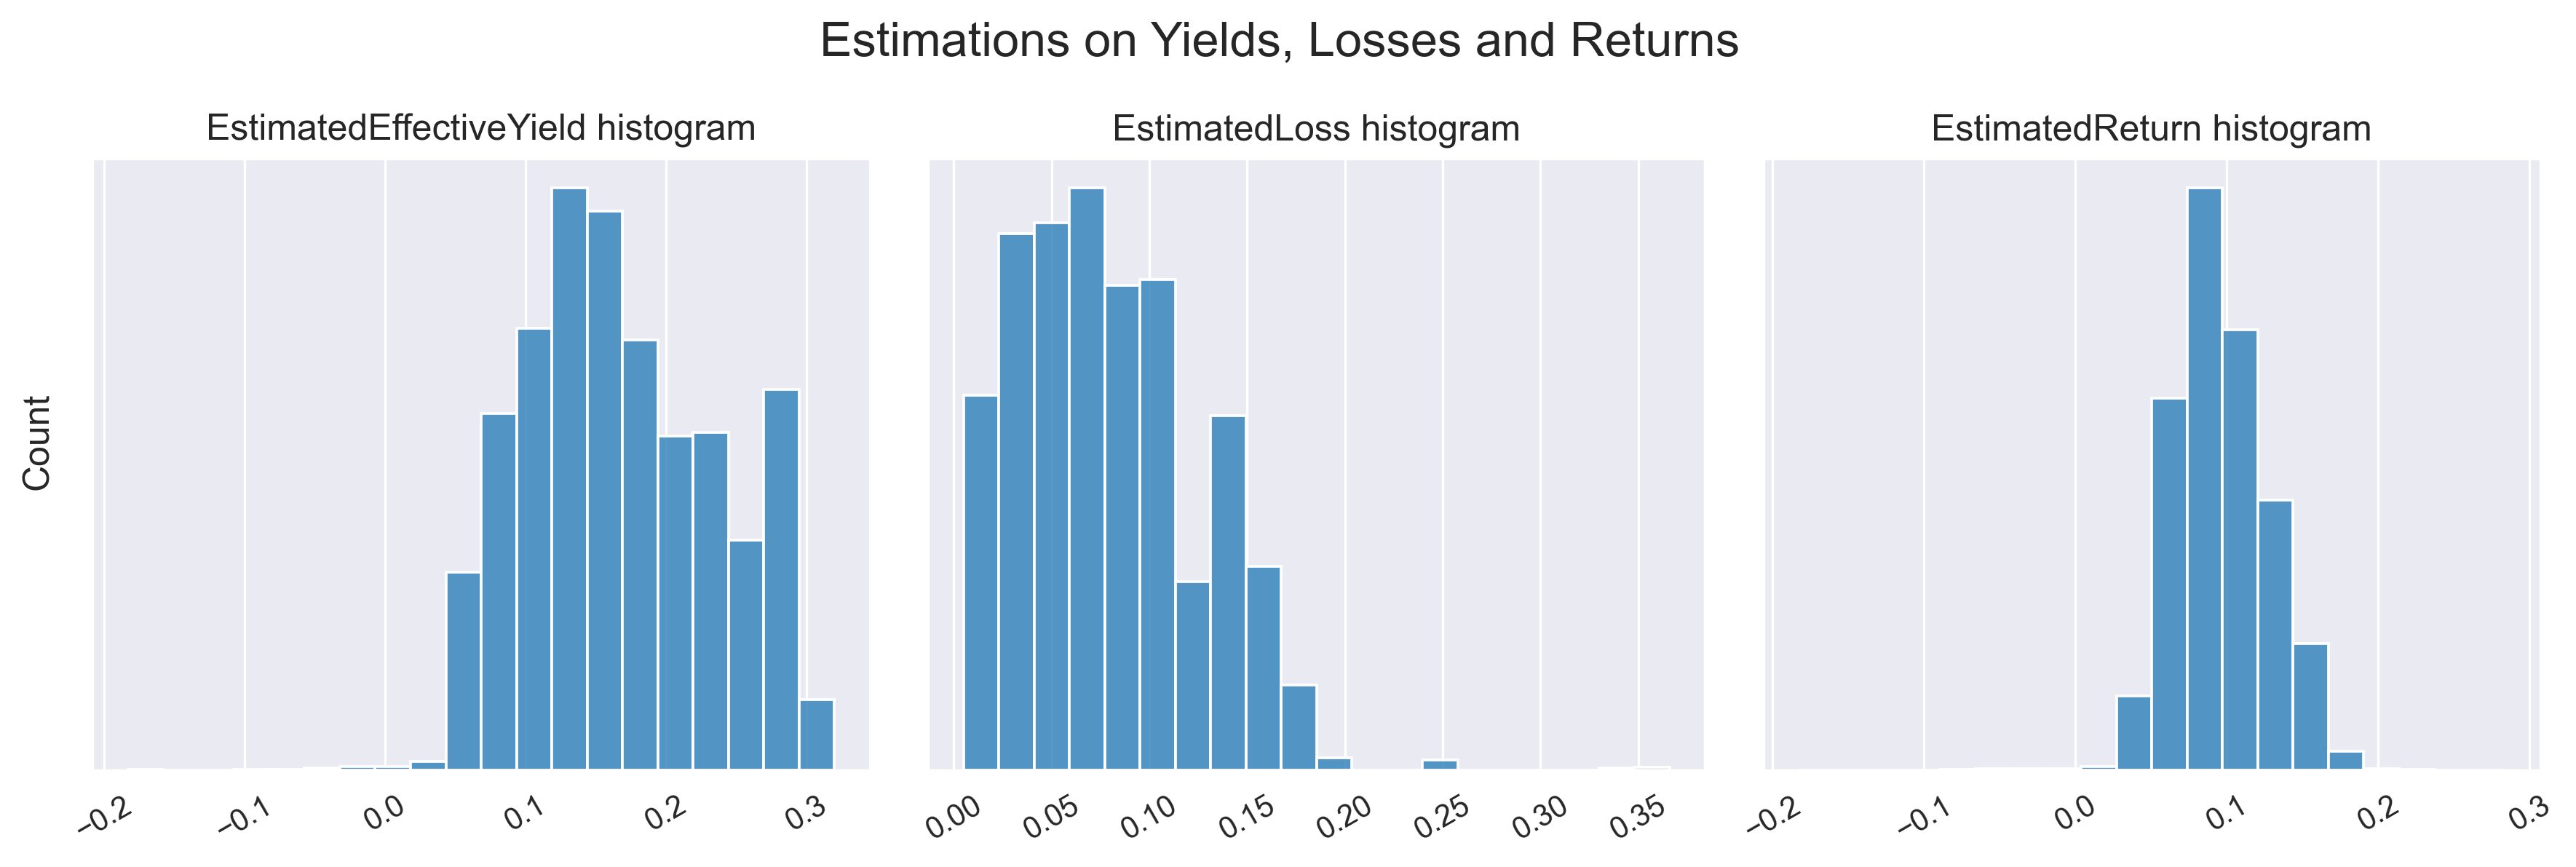

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=300)
fig.suptitle("Estimations on Yields, Losses and Returns", fontsize=16)
fig.supylabel('Count')

for idx,col in enumerate(['EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn']):
    sb.histplot(
        data=loan,
        x=col,
        ax=axes[idx],
        bins=20
    )

    # add numbers above the bars:
    axes[idx].bar_label(axes[idx].containers[0])

    # lets remove y axeis and y ticks:
    axes[idx].set_yticks([])
    axes[idx].set(yticklabels=[])

    # we will change the labels:
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("")
   

    axes[idx].set_title(f"{col} histogram");
    axes[idx].tick_params(axis="x", labelrotation=30)
    
plt.tight_layout();

The estimation histograms show a promising result with yields and returns being left skewed, indicating higher yields and returns.
And the estimated losses being right skewed, indicating that losses on loans are generally expected to be relatively smaller on a loss scale.

#### Observing the Debt to Income Ratio

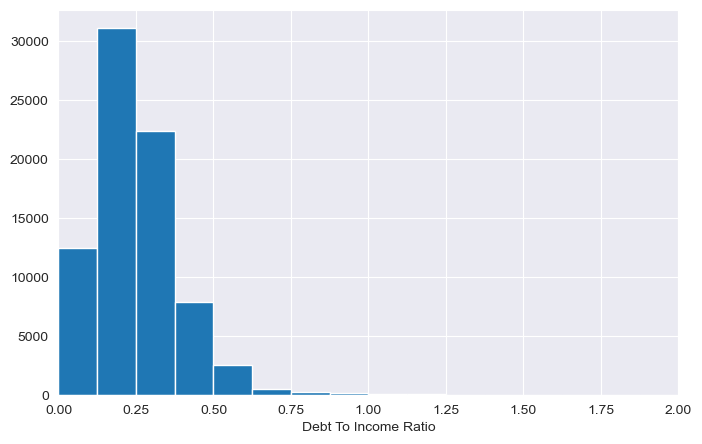

In [37]:
binsize = 0.125

bins = np.arange(0, loan['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loan, x='DebtToIncomeRatio', bins=bins)

# removing outliers 
plt.xlim(0, 2)

# plot labels
plt.xlabel('Debt To Income Ratio');

The debt to income ratio is right skewed which means that the debt to income ratio for the majority of borrowers is in an appropriate range or lower. A general rule of thumb is to keep your debt to income ratio at or below 43%. 


#### Observing the Prosper Scores, Income Ranges, Employment Status and loan status.

/Users/carafinlay/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


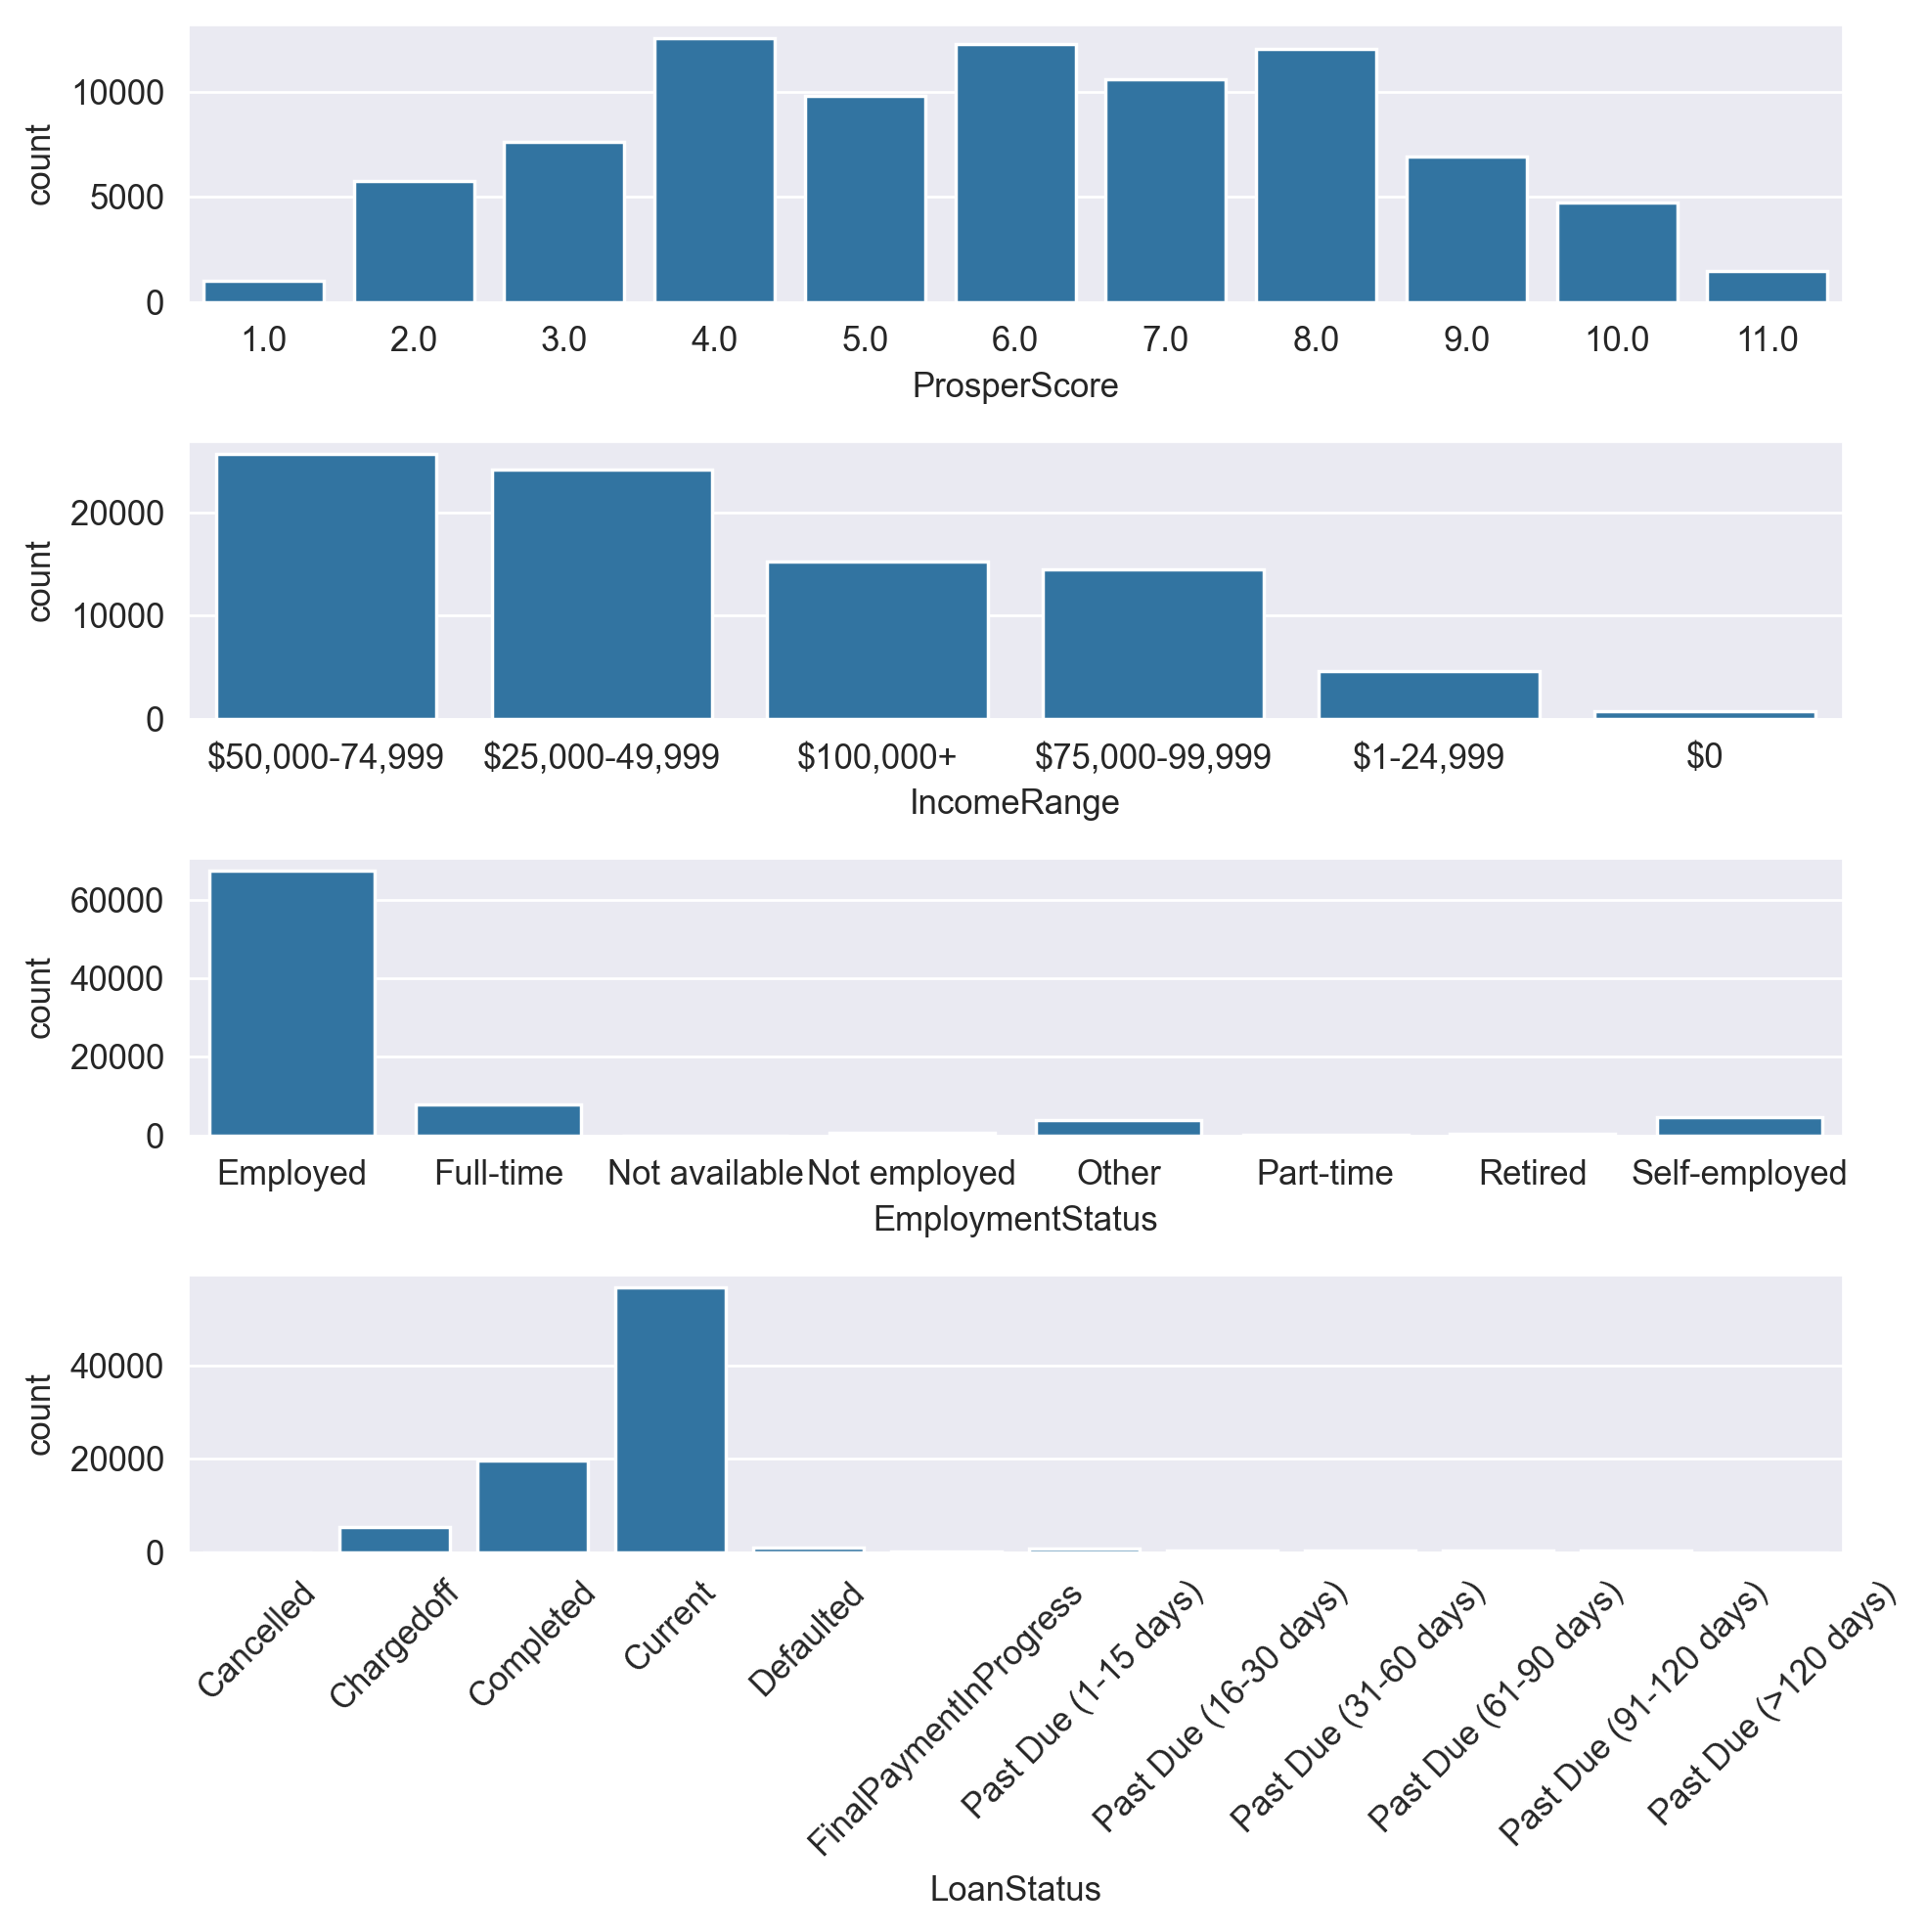

In [38]:
# Observing the Prosper Scores, Income Ranger and Employment Status

fig, ax = plt.subplots(nrows=4, figsize = [8,8],dpi=250)

default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'ProsperScore', color = default_color, ax = ax[0])
sb.countplot(data = loan, x = 'IncomeRange', color = default_color, ax = ax[1])
sb.countplot(data = loan, x = 'EmploymentStatus', color = default_color, ax = ax[2])
sb.countplot(data = loan, x = 'LoanStatus', color = default_color, ax = ax[3])

plt.xticks(rotation=45)

plt.tight_layout();

* The prosper scores are mostly in a mid range between 4 and 8. 

* The majority of borrowers earn in the income ranges of 25,000-49,999 and 50,000-74,999 USD income range. Since it is difficult to obtain a low with a very loan income, this income range is not surprising. 

* The bulk of borrowers are employed at least partially, if not full-time. It would appear that obtaining a loan as self-employed would be surprisingly difficult. This graph could also indicate that working part-time or being retired would make loan approval significantly more challenging. Unsurprisingly, no employment equates to no loans. 

* The majority of the loans in this dataset is either current or completed, another promising indicator of lower risk to lenders. 

#### Exploration of Trades that aren't ever delinquent

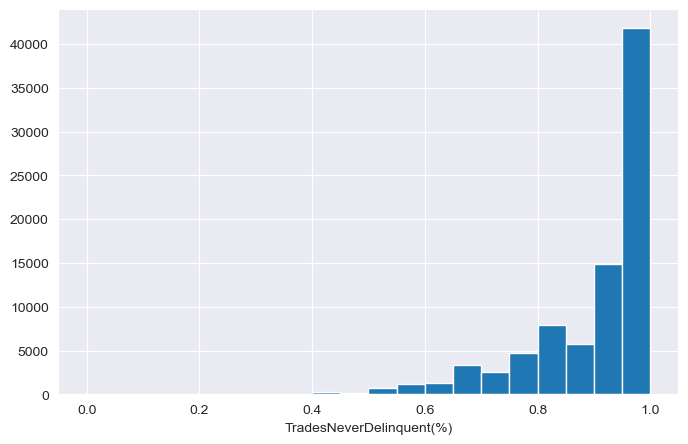

In [39]:
binsize = 0.05

bins = np.arange(0, loan['TradesNeverDelinquent (percentage)'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=loan, x='TradesNeverDelinquent (percentage)', bins=bins)
plt.xlabel('TradesNeverDelinquent(%)');

The left skewed histogram shows that the majority of borrowers don't have any delinquent trade history. This shows promise to lenders that loans will be repaid in time and is perhaps expected assuming borrowers can't easily re-obtain loans once trades are delinquent. 

#### Observing the Term of loans

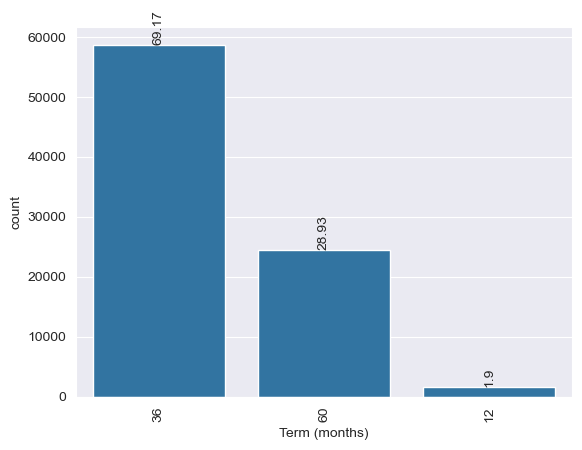

In [40]:
default_color = sb.color_palette()[0]
ax = sb.countplot(x=loan['Term'],order=loan['Term'].value_counts(ascending=False).index, color = default_color);

rel_values = loan['Term'].value_counts(ascending=False, normalize=True).values * 100

ax.bar_label(container=ax.containers[0], labels=rel_values.round(2), rotation=90)

plt.xticks(rotation=90)
plt.xlabel('Term (months)');

Another surprising finding can be observed here. Almost 70% of loans are mid term i.e. 3 years. Again, I would be interested to find out which loan category these mid term loans belong to. If they predominantly are for debt consolidation it may indicate that borrowers have accumulated debt and although are paying it off, they are chasing more debt in pursuit of avoiding payment delinquencies. 

#### Observing the Current credit lines of borrowers. 

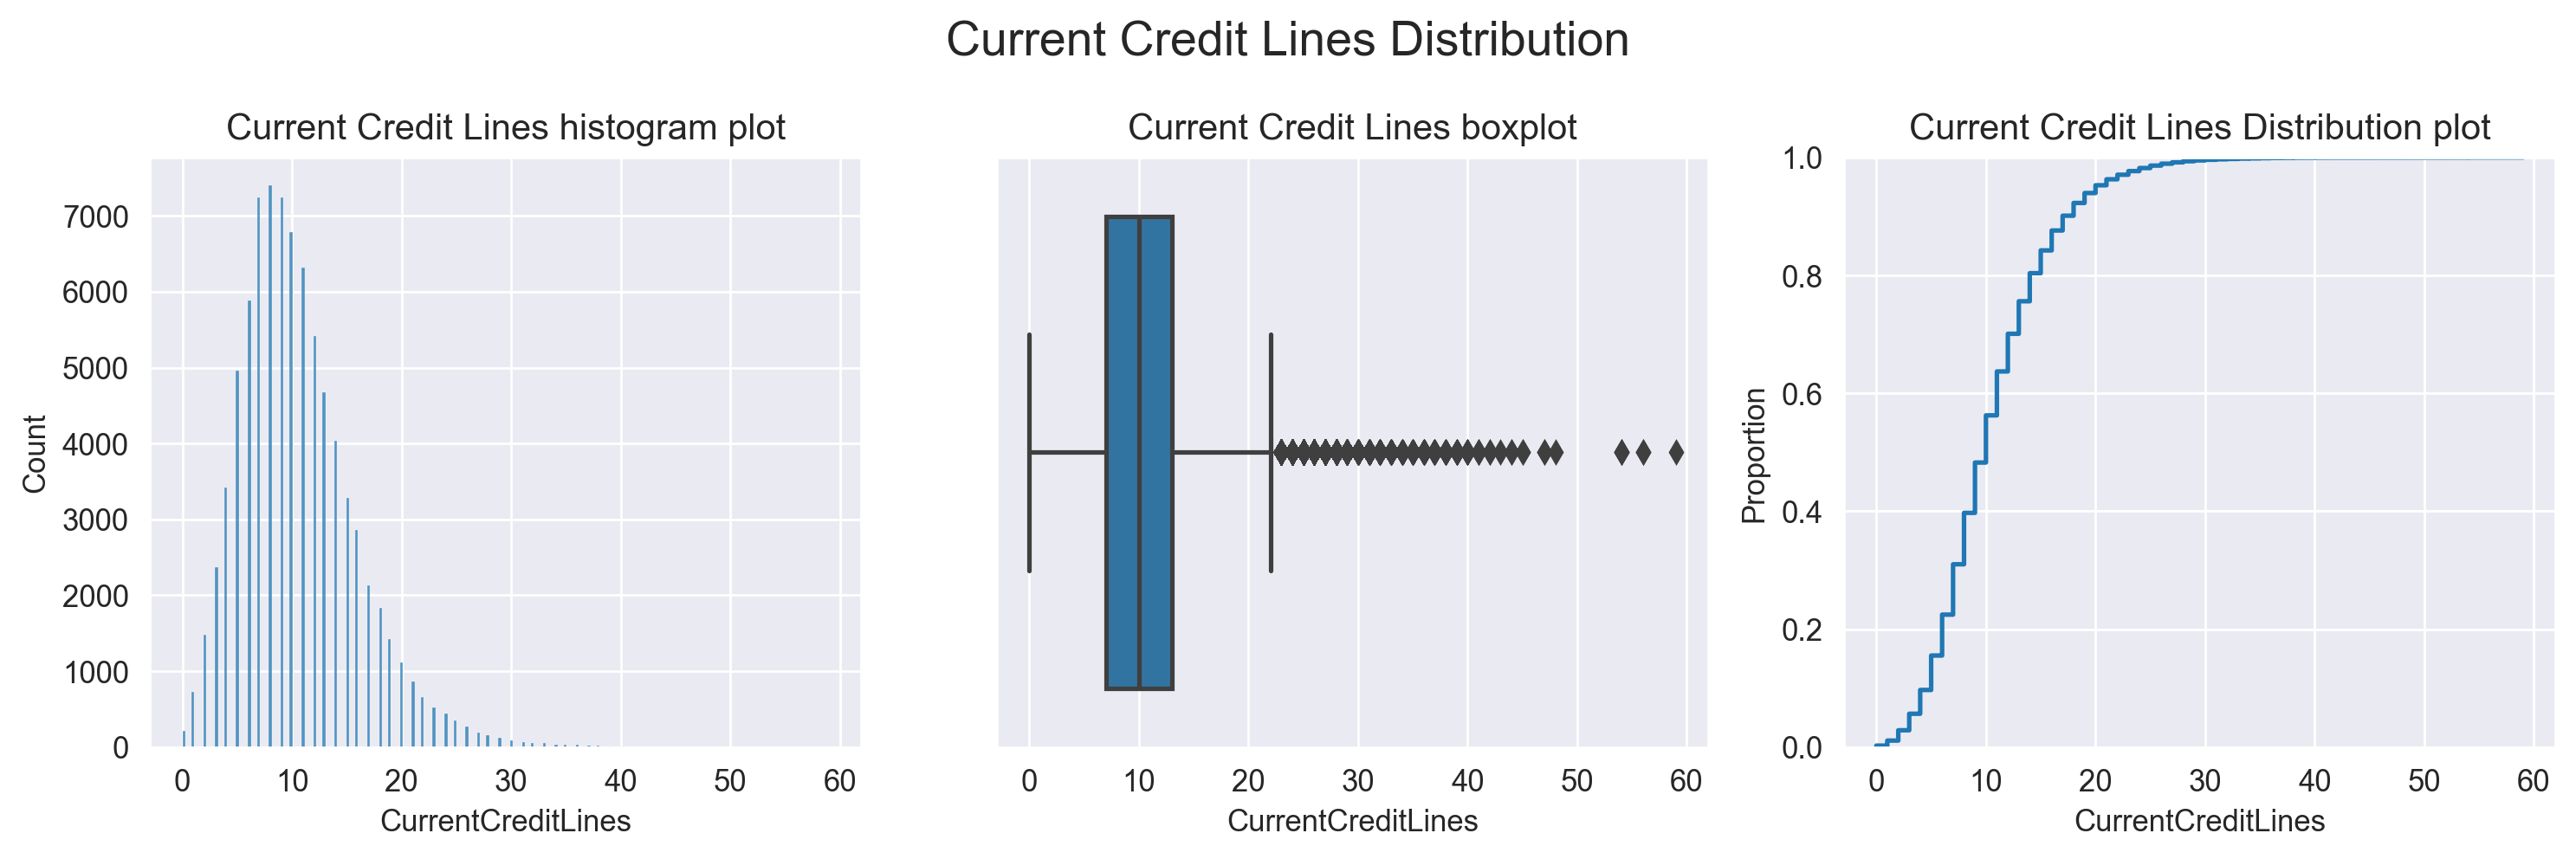

In [41]:
fig, axes = plt.subplots(1,3,figsize=[12, 4], dpi=250)

fig.suptitle("Current Credit Lines Distribution", fontsize=16)

sb.histplot(data=loan, x='CurrentCreditLines', ax = axes[0]);
sb.boxplot(data=loan, x='CurrentCreditLines', ax=axes[1]);
sb.ecdfplot(data=loan, x='CurrentCreditLines', ax=axes[2]);

axes[2].set_title('Current Credit Lines Distribution plot')
axes[0].set_title('Current Credit Lines histogram plot')
axes[1].set_title('Current Credit Lines boxplot')

# histogram customization: 
#mean_count = np.round(loan["CurrentCreditLines"].mean(), 2)
#axes[0].axvline(mean_count, color="orange", linestyle="-.", linewidth=1.5)

#axes[0].text(
#    x=mean_price,
#    y=8500,
#    s=f"mean={mean_price}",
#    style="italic",
#    color='orange'
#)

plt.tight_layout();

The previous finding in regards to loan term, led to the observation of current credit lines among borrowers. Borrowers have an average of 10.32 current credit lines. Although this was expected, the extent of current loans is shocking. Only around 10% of borrowers have 5 current credit lines and around 10% have 20 or more. 

### Discussions of distributions of key features of interest:

> Surprisingly almost 70% of loans are for debt consolidation. On average borrowers have 10 current credit lines and many have even more. Although delinquencies are low, given the current findings it appears that borrowers are in a debt cycle, which may be accumulative. Further investigation to determine accumulation would be interesting for analysis. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* In section 1.4.0.5 Observing the Debt to Income Ratio outliers were removed so that only data between 0 and 2 is plotted. 

* Appropriate bin sizes were chosen for histograms. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [42]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ListingCreationDate                 84853 non-null  datetime64[ns]
 1   ProsperScore                        84853 non-null  category      
 2   Term                                84853 non-null  category      
 3   LoanStatus                          84853 non-null  category      
 4   LenderYield                         84853 non-null  float64       
 5   EstimatedEffectiveYield             84853 non-null  float64       
 6   EstimatedLoss                       84853 non-null  float64       
 7   EstimatedReturn                     84853 non-null  float64       
 8   EmploymentStatus                    84853 non-null  category      
 9   IncomeRange                         84853 non-null  object        
 10  DebtToIncomeRatio    

#### Plotting the categorical variablesi.e. Income Range, Employment status, term and prosper score vs the loan amounts as histograms and boxplots

In [43]:
categoric_vars = ['IncomeRange', 'EmploymentStatus','Term','ProsperScore']

fig, axes = plt.subplots(4, 2, figsize = [16,16], dpi=800)
fig.suptitle("Income Range, Employment Status Vs Loan Amount", fontsize=16)

for idx, col in enumerate(categoric_vars):
    sb.barplot(data = loan, x=col, y= 'LoanOriginalAmount', ax=axes[idx][0], palette='crest')
    sb.boxplot(data = loan, y='LoanOriginalAmount', x = col, ax=axes[idx][1], palette='crest')
    axes[idx][1].set_ylabel("")
    axes[idx][0].tick_params(axis="x", labelrotation=30)
    axes[idx][1].tick_params(axis="x", labelrotation=30)

plt.tight_layout();

/Users/carafinlay/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
/Users/carafinlay/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


* Income range vs Loan Amount: In a previous count graph we observed very few borrowers in the 0 USD income range, therefore it is surprising to see that the mean loan amount for this category is around 7000 USD. The rest of the plot is as expected, i.e the lower the income range the lower the loan amount. The right skewed box plot for 0USD income category confirms that there are some high value loans for individuals without any income. 

* Employment status vs Loan Amount: We also saw in a previous plot that there were few borrowers in the self-employed category. Here we see that despite the low number of borrowers in this category, the mean loan amount in very high at 7 000 USD compared to the employed category with the highest mean loan amount of almost 10 000 USD. This graph is surprising in general as the unemployed category has a much higher mean than expected. The right skewed box plot for unemployed category confirms that there are some high value loans for individuals without any employment. This coincides with the income range observations. 

* Term vs Loan Amount: Observations as as expected. The lower the loan amount the lower the term.

* Prosper Score vs Loan Amount: Observations as as expected. The higher the prosper score the higher the loan amount.

#### Observations of a plot matrix of numerical values in the dataset

loan.shape= (84853, 15)
loan_samp.shape= (800, 15)


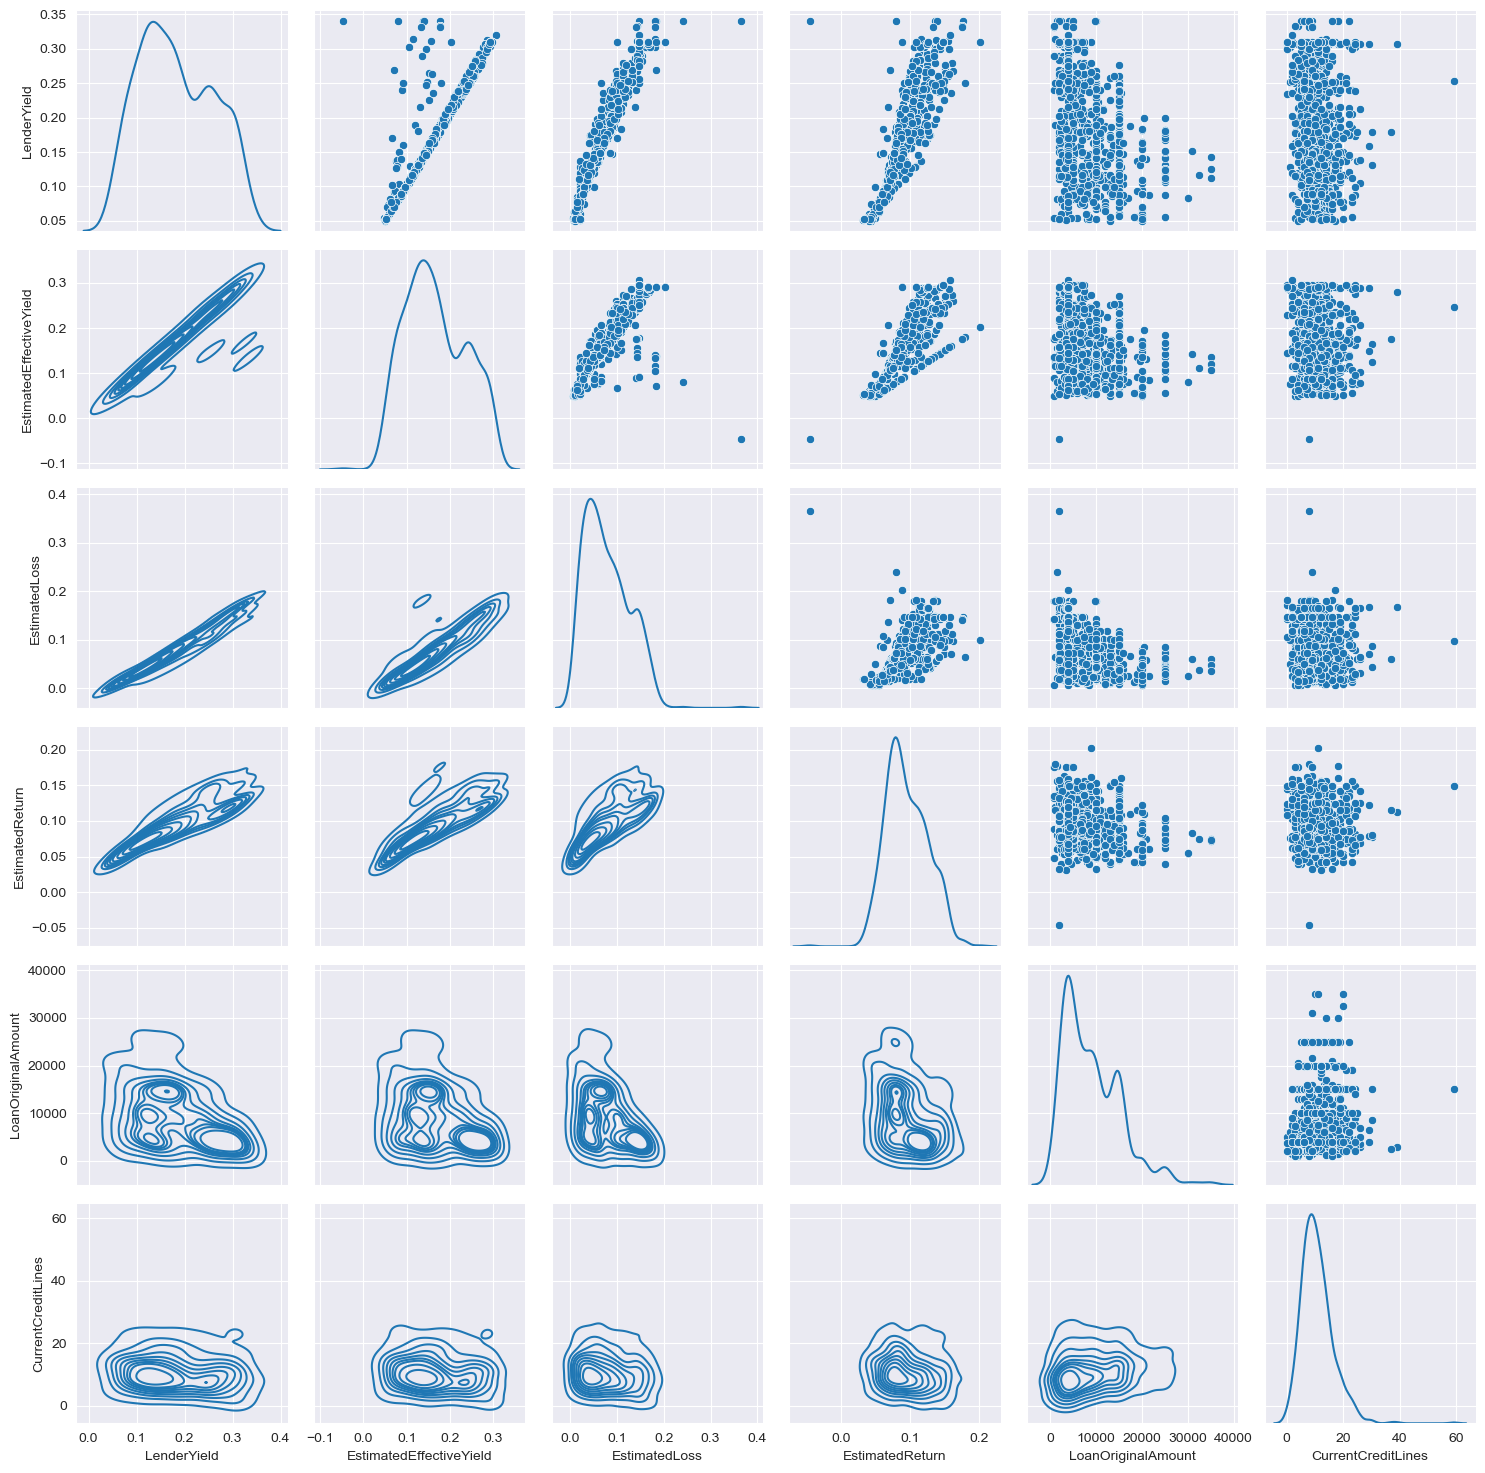

In [44]:
# plot matrix: sample 800 
numeric_vars = ['LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss','EstimatedReturn','LoanOriginalAmount','CurrentCreditLines']

print("loan.shape=",loan.shape)
loans_samp = loan.sample(n=800, replace=False)
print("loan_samp.shape=",loans_samp.shape)

g = sb.PairGrid(data=loans_samp, vars=numeric_vars, dropna=True, diag_sharey=False)
g.map_diag(sb.kdeplot)
g.map_upper(sb.scatterplot)
g.map_lower(sb.kdeplot);

**Positive and highly correlated observations:**
* Lender yield vs estimated effective yield
* Lender yield vs estimated loss
* Lender yield vs estimated return
* estimated effective yield vs estimated loss
* estimated effective yield vs estimated return
* estimated loss vs estimated return

#### Lender Yield vs Estimated Loss

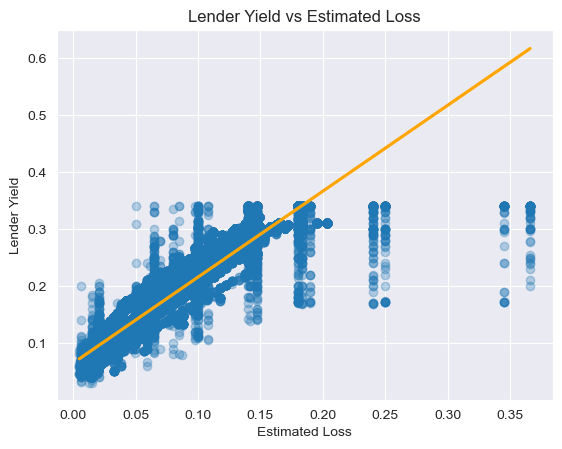

In [45]:
g = sb.regplot(data=loan, x='EstimatedLoss', y='LenderYield',
             scatter_kws={'alpha': 0.3}, line_kws={'color':'orange'});

g.set(title='Lender Yield vs Estimated Loss',
     xlabel = 'Estimated Loss',
     ylabel = 'Lender Yield')

plt.savefig("Lender Yield vs Estimated Loss.png", dpi=300)

* A positive correlation is observed between with estimates loss and lender yield. The higher the lender yield the higher the estimated loss. Various factors could increase lender yield such as higher interest rates, which are usually implemented when the loan involves risk factors.

#### Observing the relations between loan amount and lender yield

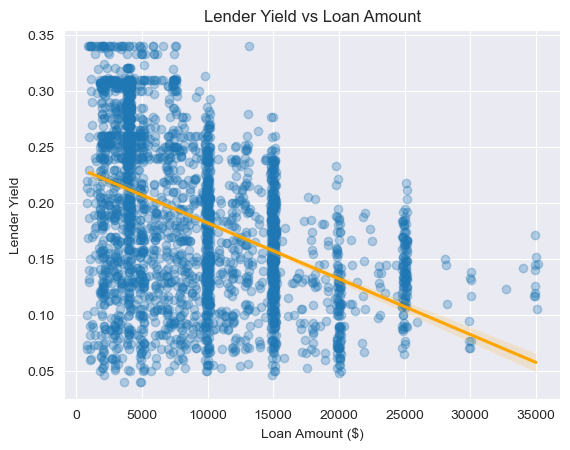

In [46]:
g = sb.regplot(data=loan.sample(3000, random_state=1), x='LoanOriginalAmount', y='LenderYield', 
            x_jitter=200, scatter_kws={'alpha': 0.3}, line_kws={'color':'orange'});

g.set(title='Lender Yield vs Loan Amount',
     xlabel = 'Loan Amount ($)',
     ylabel = 'Lender Yield')

plt.savefig("Lender Yield vs Loan Amount.png", dpi=300)

* There is a negative correlation between the loan amount and the lender yield. One could expect the higher loans to produce a larger lender yield, but the opposite is observed. As previous observations were made that over 40% of borrowers had loans of around 5000 USD, 40 % of borrowers had atleast 10 current credit lines, and almost 70% of borrowers taking out loans for debt repayment this yield correlation is perhaps not too surprising.

#### Observing the average loan amounts in various categories. 

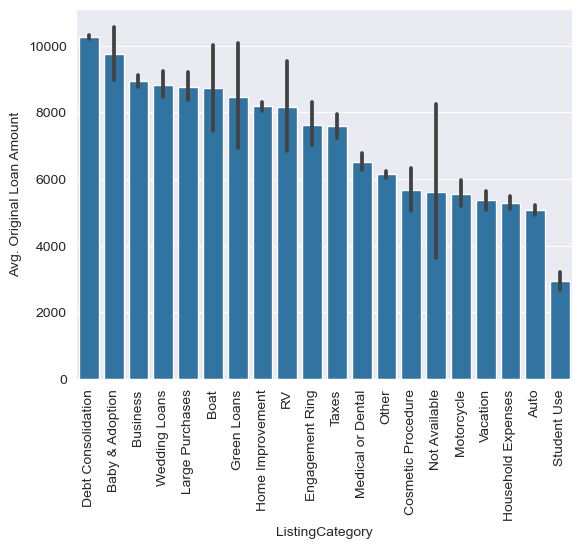

In [47]:
base_color = sb.color_palette()[0]
sb.barplot(data=loan, x='ListingCategory', y='LoanOriginalAmount', color=base_color, order=loan.groupby('ListingCategory')['LoanOriginalAmount'].mean().sort_values(ascending=False).index)
plt.xticks(rotation=90);
plt.ylabel('Avg. Original Loan Amount');

* Even though almost 70% of loans are in the debt consolidation category, and the average loan amount in this category is the highest, its mean is not significantly higher than many of the other categories. Baby & Adoption loans are also high, as is business, wedding, large purchases and boats. 

#### Observing the relationship between current credit lines and loan amount where loans are current

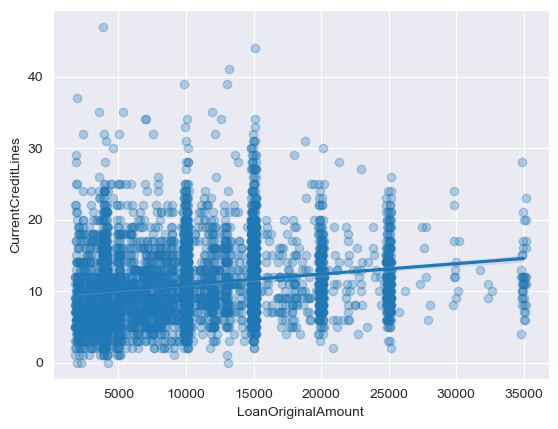

In [48]:
sb.regplot(data=loan[loan['LoanStatus']=='Current'].sample(5000, random_state=1), x='LoanOriginalAmount', y='CurrentCreditLines', 
            x_jitter=200, scatter_kws={'alpha': 0.3});

* There is a positive correlation observed between loan amount and the number of current credit lines among borrowers. The higher the number of current credit lines, the higher the loans. Since debt consolidation is the most common loan category, this relationship is not surprising and suggests that the majority of borrowers have fallen into a debt trap.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* There is a negative correlation between loan amount and lender yield.
* There is a positive correlation between loan amount and number of current credit lines.
* Data consolidation has the highest average loan amount, but it is not significantly higher than other categories. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* The average loan amount for unemployed and the 0 USD income ranges is significantly higher than expected. Right skewed box plots show that this is due to few unusually high loans in these categories. 

## Multivariate Exploration

#### Relational scatter plot to observe Lender Yield vs Estimated Loss based on Employment Status

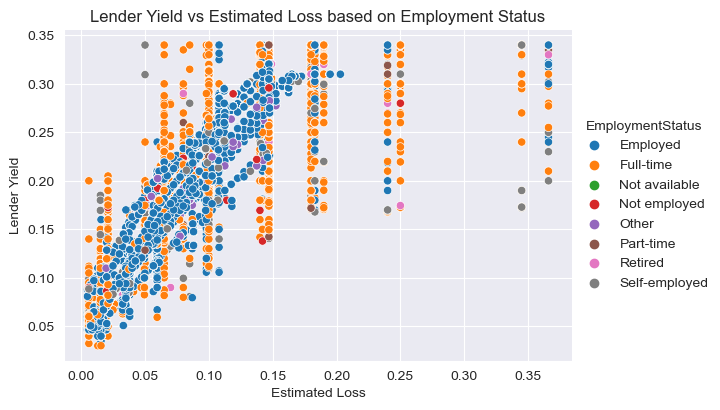

In [49]:
g = sb.relplot(data=loan, x='EstimatedLoss', y='LenderYield', 
               hue='EmploymentStatus', height=4, aspect=1.5)

g.set(title='Lender Yield vs Estimated Loss based on Employment Status', 
      xlabel='Estimated Loss', 
      ylabel='Lender Yield')

g.savefig("Lender Yield vs Estimated Loss based on Employment Status.png", dpi=300)

* We previously observed a positive correlation between the lender yield and estimated loss. The relational plot includes employee status to produce a more granular understanding of this correlation. Key differences between borrowers with an employment status of employed versus full time is observed. The trend of the majority of employed borrowers follow fixed curves in the estimated loss vs lender yield space, however full time employees do not follow these trends and have a much larger spread in lender yield for a given estimated loss.

#### Relational scatter plot to observe Lender Yield vs Estimated Loss based on Prosper Score

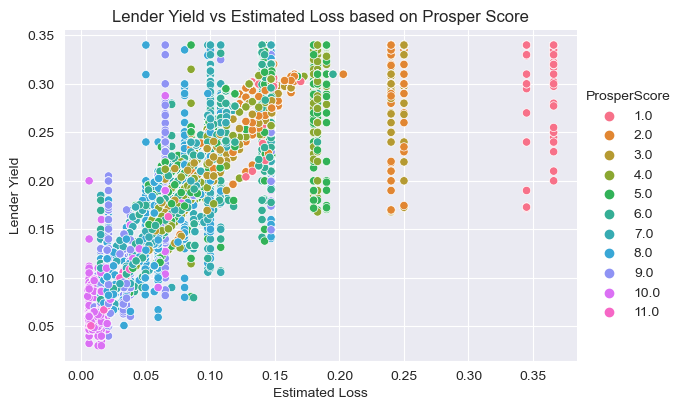

In [50]:
g = sb.relplot(data=loan, x='EstimatedLoss', y='LenderYield', hue='ProsperScore', height=4, aspect=1.5);

g.set(title='Lender Yield vs Estimated Loss based on Prosper Score', 
      xlabel='Estimated Loss', 
      ylabel='Lender Yield')

g.savefig("Lender Yield vs Estimated Loss based on Prosper Score.png", dpi=300)

* In order to better understand the larger spread observed in the previous plot, this plot looks at the impact of prosper score on the relationship between lender yield and estimated loss. Here we observe that lender yield varies immensely based on specific estimated losses. The estimated losses are also related to the prosper score, where the lower the prosper score the higher the estimated loss, but the lender yield may be low or high. Some factors such as borrower interest rate, delinquent payments, debt to income ratio and income range may increase or decrease lender yield. The relationship between estimated loss and prosper score is clearly observed here. We also see a relationship between lender yield and prosper score, when the prosper score decrease the lender yield increase, perhaps due to increased interest rate. 
 

#### Relational scatter plot to observe lender yield vs estimated loss based on loan term

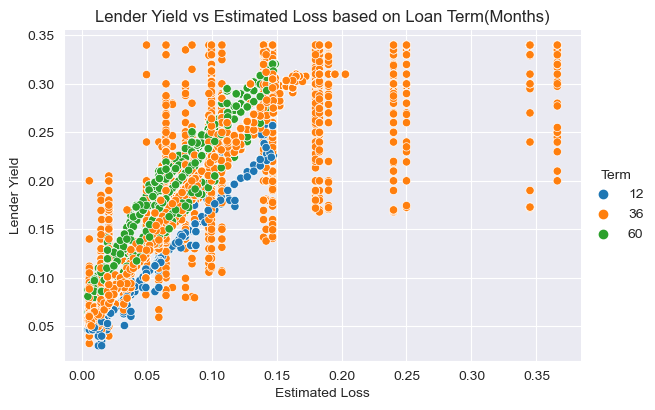

In [51]:
g = sb.relplot(data=loan, x='EstimatedLoss', y='LenderYield', hue='Term', height=4, aspect=1.5);

g.set(title='Lender Yield vs Estimated Loss based on Loan Term(Months)', 
      xlabel='Estimated Loss', 
      ylabel='Lender Yield')

g.savefig("Lender Yield vs Estimated Loss based on Loan Term.png", dpi=300)

* The same relational plot between lender yield and estimated loss can be further differentiate by the loan, term. Another interesting observation arises where the 12 and 60 month loans follow a trend, although some mid term loans of 36 months follow the trend, many do not. The 36 month loans have a much larger spread in lender yield for a given estimated loss. 

#### Relational scatter plot to observe lender yield vs loan amount based on prosper score

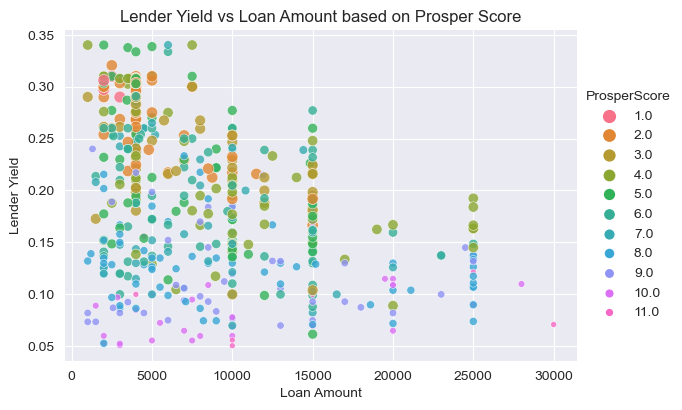

In [52]:
g = sb.relplot(data=loan.sample(500, random_state=1), x='LoanOriginalAmount', y='LenderYield', 
            size='ProsperScore', hue='ProsperScore', alpha=0.8, height=4, aspect=1.5)

g.set(title='Lender Yield vs Loan Amount based on Prosper Score', 
      xlabel='Loan Amount', 
      ylabel='Lender Yield')

g.savefig("Lender Yield vs Loan Amount based on Prosper Score.png", dpi=300)

* The plot shows that lower prosper score have a higher lender yield. Higher interest rates could be a potential influencing factor.

#### Relational scatter plot to observe lender yield vs estimated loss based on prosper score

* for Loans less than 5000USD for borrowers with less than 10 Credit Lines

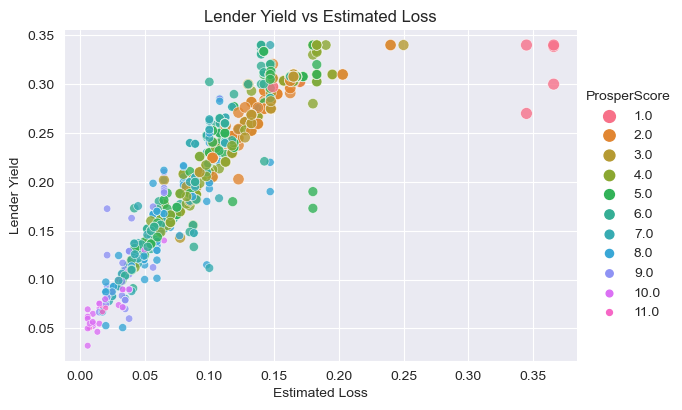

In [53]:
# filtering the loan dataset

loana = loan[(loan['LoanOriginalAmount'] <= 5000) & (loan['CurrentCreditLines'] <= 10)]

g = sb.relplot(data=loana.sample(1000, random_state=1), x='EstimatedLoss', y='LenderYield', 
            size='ProsperScore', hue='ProsperScore', alpha=0.8, height=4, aspect=1.5);

g.set(title='Lender Yield vs Estimated Loss', 
      xlabel='Estimated Loss', 
      ylabel='Lender Yield')

g.savefig("ender Yield vs Estimated Loss for Loans less than 5000USD and borrower has sub 10 Credit Lines.png", dpi=300)


* The lower the prosper score the higher the estimated loss and the higher the lender yield. Prosper scores between 6 and 9 show potential for higher yields and lower estimated losses compared to other scores. A prosper score of 1 significantly increase the estimated loss.

<Figure size 800x500 with 0 Axes>

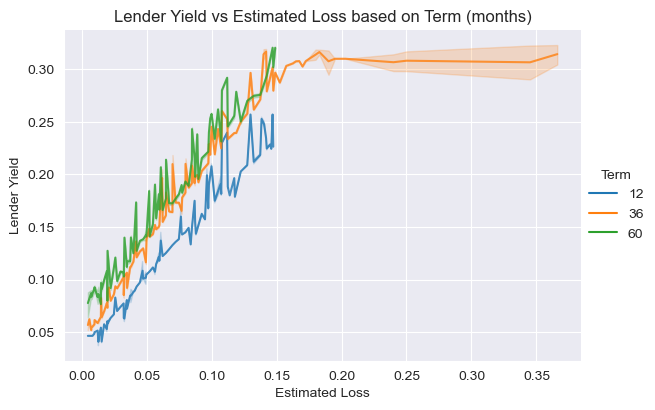

In [54]:
plt.figure(figsize=(8, 5));

g = sb.relplot(data=loan, x='EstimatedLoss', y='LenderYield', 
        hue='Term',kind='line', alpha=0.8, height=4, aspect=1.5);

g.set(title='Lender Yield vs Estimated Loss based on Term (months)', 
      xlabel='Estimated Loss', 
      ylabel='Lender Yield')

g.savefig("Lender Yield vs Estimated Loss based on Term", dpi=300)


* Differences can be observed in the lender yield for the three different loan terms. 12 month loans have a lower lender yield, but similar estimated loss compared to 36 month and 60 month loans. 60 month loans have the highest lender yield. We also see that lender yields around 0.3 for the 36 month term have a large range of estimated losses where estimated losses significantly increase. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* Loan Yields increased as prosper scores decreased.
* Estimated losses increased as prosper scores decreased.
* Loan terms of 36 and 60 months produced higher lender yields. 

### Were there any interesting or surprising interactions between features?

* Lender yields no longer fit the trend once estimated loss surpassed 0.15.
* The trend of the majority of employed borrowers follow fixed curves in the estimated loss vs lender yield space, however full time employees do not follow these trends and have a much larger spread in lender yield for a given estimated loss.


## Conclusions

* A positive correlation exists between loan yields and estimated losses. 
* Higher loan yields and lower estimated losses can be found in the upper left hand quadrant of the multivariate scatter plots.
* Higher loan yields with the lowest estimated losses were found for borrowers in the full time employment category with prosper scores between 6 and 9 for loan terms 36 and 60 months. 
* Smaller loans also produced higher yields.